C:\Users\samir\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 75023.9922 - val_loss: 2186.9231
Epoch 2/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 7241.5786 - val_loss: 2961.9873
Epoch 3/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 3591.0474 - val_loss: 1654.9637
Epoch 4/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2936.3547 - val_loss: 1555.7024
Epoch 5/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2956.9146 - val_loss: 2011.9473
Epoch 6/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 2455.0867 - val_loss: 1880.2480
Epoch 7/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2054.4448 - val_loss: 1828.6411
Epoch 8/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2148.5247 - val_loss: 2117.1675
Epoch 9/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2146.2966 - val_loss: 2055.0432
Epoch 10/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2303.2637 - val_loss: 1994.9886
Epoch 11/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1897.2502 - val_loss: 1916.

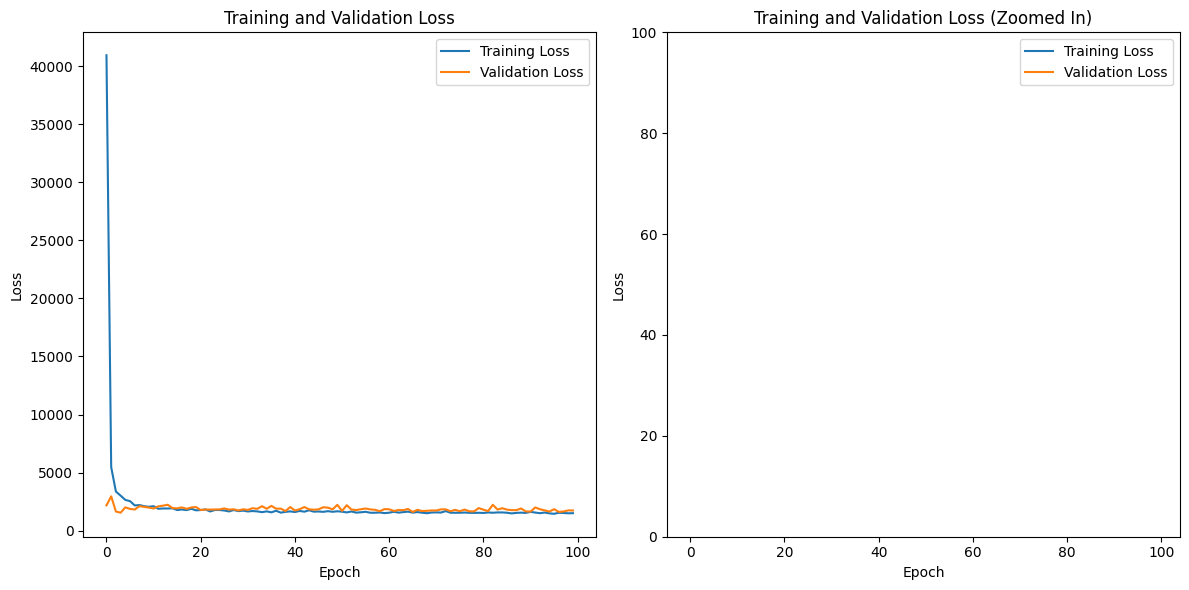

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Load the dataset
data = pd.read_csv('./salary_data_cleaned/salary_data_cleaned.csv')

# Select relevant features for the model
features = ['Job Title', 'Company Name', 'Location', 'Sector', 'Industry', 'Revenue', 'Founded', 
            'python_yn', 'R_yn', 'spark', 'aws', 'excel']
target = 'avg_salary'

# Encode categorical variables
data_encoded = data.copy()
label_encoders = {}
for column in ['Job Title', 'Company Name', 'Location', 'Sector', 'Industry', 'Revenue']:
    label_encoders[column] = LabelEncoder()
    data_encoded[column] = label_encoders[column].fit_transform(data[column])

# Split the dataset into training and testing sets
X = data_encoded[features]
y = data_encoded[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build the neural network model
model = Sequential()
model.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=1)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Neural Network - MAE: {:.2f}, MSE: {:.2f}, R²: {:.2f}".format(mae, mse, r2))

# Plot the training history
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss (Zoomed In)')
plt.legend()
plt.ylim(0, 100)

plt.tight_layout()
plt.show()


C:\Users\samir\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/5 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/stepWARNING:tensorflow:5 out of the last 11 calls to <function TensorFlowTrainer.make_predict_function.<locals>.one_step_on_data_distributed at 0x000001DEFE3767A0> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


C:\Users\samir\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


C:\Users\samir\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


C:\Users\samir\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 63ms/step
FFNN - MAE: 37.68, MSE: 2501.92, R²: -0.53
CNN - MAE: 34.95, MSE: 1827.81, R²: -0.12
RNN - MAE: 31.36, MSE: 1614.54, R²: 0.01
LSTM - MAE: 31.09, MSE: 1746.96, R²: -0.07


C:\Users\samir\AppData\Local\Temp\ipykernel_19392\3865507800.py:110: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='MAE', data=evaluation_df, palette='viridis')
C:\Users\samir\AppData\Local\Temp\ipykernel_19392\3865507800.py:117: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='MSE', data=evaluation_df, palette='viridis')
C:\Users\samir\AppData\Local\Temp\ipykernel_19392\3865507800.py:124: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='R²', data=evaluation_df, palette='viridis')


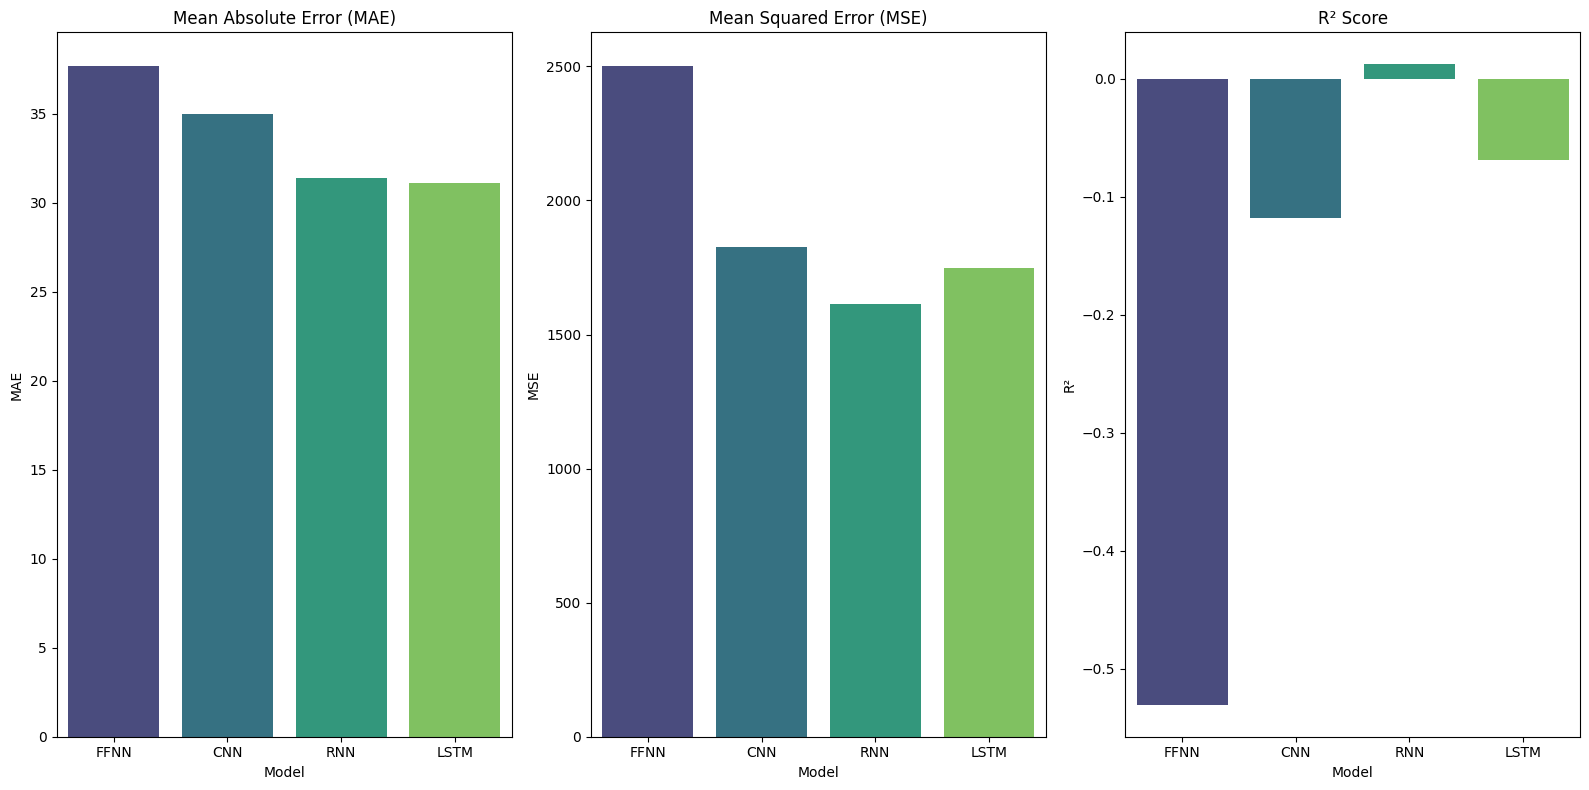

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv1D, Flatten, LSTM, SimpleRNN

# Load the dataset
data = pd.read_csv('./salary_data_cleaned/salary_data_cleaned.csv')

# Select relevant features for the model
features = ['Job Title', 'Company Name', 'Location', 'Sector', 'Industry', 'Revenue', 'Founded', 
            'python_yn', 'R_yn', 'spark', 'aws', 'excel']
target = 'avg_salary'

# Encode categorical variables
data_encoded = data.copy()
label_encoders = {}
for column in ['Job Title', 'Company Name', 'Location', 'Sector', 'Industry', 'Revenue']:
    label_encoders[column] = LabelEncoder()
    data_encoded[column] = label_encoders[column].fit_transform(data[column])

# Split the dataset into training and testing sets
X = data_encoded[features]
y = data_encoded[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Prepare the input data for CNN and LSTM (3D shape: samples, timesteps, features)
X_train_cnn_lstm = np.expand_dims(X_train, axis=2)
X_test_cnn_lstm = np.expand_dims(X_test, axis=2)

# Function to evaluate the model
def evaluate_model(y_test, y_pred):
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    return mae, mse, r2

# FFNN Model
ffnn_model = Sequential()
ffnn_model.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))
ffnn_model.add(Dropout(0.2))
ffnn_model.add(Dense(64, activation='relu'))
ffnn_model.add(Dropout(0.2))
ffnn_model.add(Dense(32, activation='relu'))
ffnn_model.add(Dense(1))
ffnn_model.compile(optimizer='adam', loss='mean_squared_error')
ffnn_model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=0)
ffnn_pred = ffnn_model.predict(X_test)

# CNN Model
cnn_model = Sequential()
cnn_model.add(Conv1D(64, kernel_size=2, activation='relu', input_shape=(X_train_cnn_lstm.shape[1], X_train_cnn_lstm.shape[2])))
cnn_model.add(Flatten())
cnn_model.add(Dense(64, activation='relu'))
cnn_model.add(Dense(32, activation='relu'))
cnn_model.add(Dense(1))
cnn_model.compile(optimizer='adam', loss='mean_squared_error')
cnn_model.fit(X_train_cnn_lstm, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=0)
cnn_pred = cnn_model.predict(X_test_cnn_lstm)

# RNN Model
rnn_model = Sequential()
rnn_model.add(SimpleRNN(64, activation='relu', input_shape=(X_train_cnn_lstm.shape[1], X_train_cnn_lstm.shape[2])))
rnn_model.add(Dense(32, activation='relu'))
rnn_model.add(Dense(1))
rnn_model.compile(optimizer='adam', loss='mean_squared_error')
rnn_model.fit(X_train_cnn_lstm, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=0)
rnn_pred = rnn_model.predict(X_test_cnn_lstm)

# LSTM Model
lstm_model = Sequential()
lstm_model.add(LSTM(64, activation='relu', input_shape=(X_train_cnn_lstm.shape[1], X_train_cnn_lstm.shape[2])))
lstm_model.add(Dense(32, activation='relu'))
lstm_model.add(Dense(1))
lstm_model.compile(optimizer='adam', loss='mean_squared_error')
lstm_model.fit(X_train_cnn_lstm, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=0)
lstm_pred = lstm_model.predict(X_test_cnn_lstm)

# Evaluate models
ffnn_mae, ffnn_mse, ffnn_r2 = evaluate_model(y_test, ffnn_pred)
cnn_mae, cnn_mse, cnn_r2 = evaluate_model(y_test, cnn_pred)
rnn_mae, rnn_mse, rnn_r2 = evaluate_model(y_test, rnn_pred)
lstm_mae, lstm_mse, lstm_r2 = evaluate_model(y_test, lstm_pred)

# Print evaluation results
print("FFNN - MAE: {:.2f}, MSE: {:.2f}, R²: {:.2f}".format(ffnn_mae, ffnn_mse, ffnn_r2))
print("CNN - MAE: {:.2f}, MSE: {:.2f}, R²: {:.2f}".format(cnn_mae, cnn_mse, cnn_r2))
print("RNN - MAE: {:.2f}, MSE: {:.2f}, R²: {:.2f}".format(rnn_mae, rnn_mse, rnn_r2))
print("LSTM - MAE: {:.2f}, MSE: {:.2f}, R²: {:.2f}".format(lstm_mae, lstm_mse, lstm_r2))

# Store evaluation results
evaluation_results = {
    'Model': ['FFNN', 'CNN', 'RNN', 'LSTM'],
    'MAE': [ffnn_mae, cnn_mae, rnn_mae, lstm_mae],
    'MSE': [ffnn_mse, cnn_mse, rnn_mse, lstm_mse],
    'R²': [ffnn_r2, cnn_r2, rnn_r2, lstm_r2]
}

evaluation_df = pd.DataFrame(evaluation_results)

# Plot the evaluation results using bar plots
plt.figure(figsize=(16, 8))

# MAE Plot
plt.subplot(1, 3, 1)
sns.barplot(x='Model', y='MAE', data=evaluation_df, palette='viridis')
plt.title('Mean Absolute Error (MAE)')
plt.xlabel('Model')
plt.ylabel('MAE')

# MSE Plot
plt.subplot(1, 3, 2)
sns.barplot(x='Model', y='MSE', data=evaluation_df, palette='viridis')
plt.title('Mean Squared Error (MSE)')
plt.xlabel('Model')
plt.ylabel('MSE')

# R² Plot
plt.subplot(1, 3, 3)
sns.barplot(x='Model', y='R²', data=evaluation_df, palette='viridis')
plt.title('R² Score')
plt.xlabel('Model')
plt.ylabel('R²')

plt.tight_layout()
plt.show()


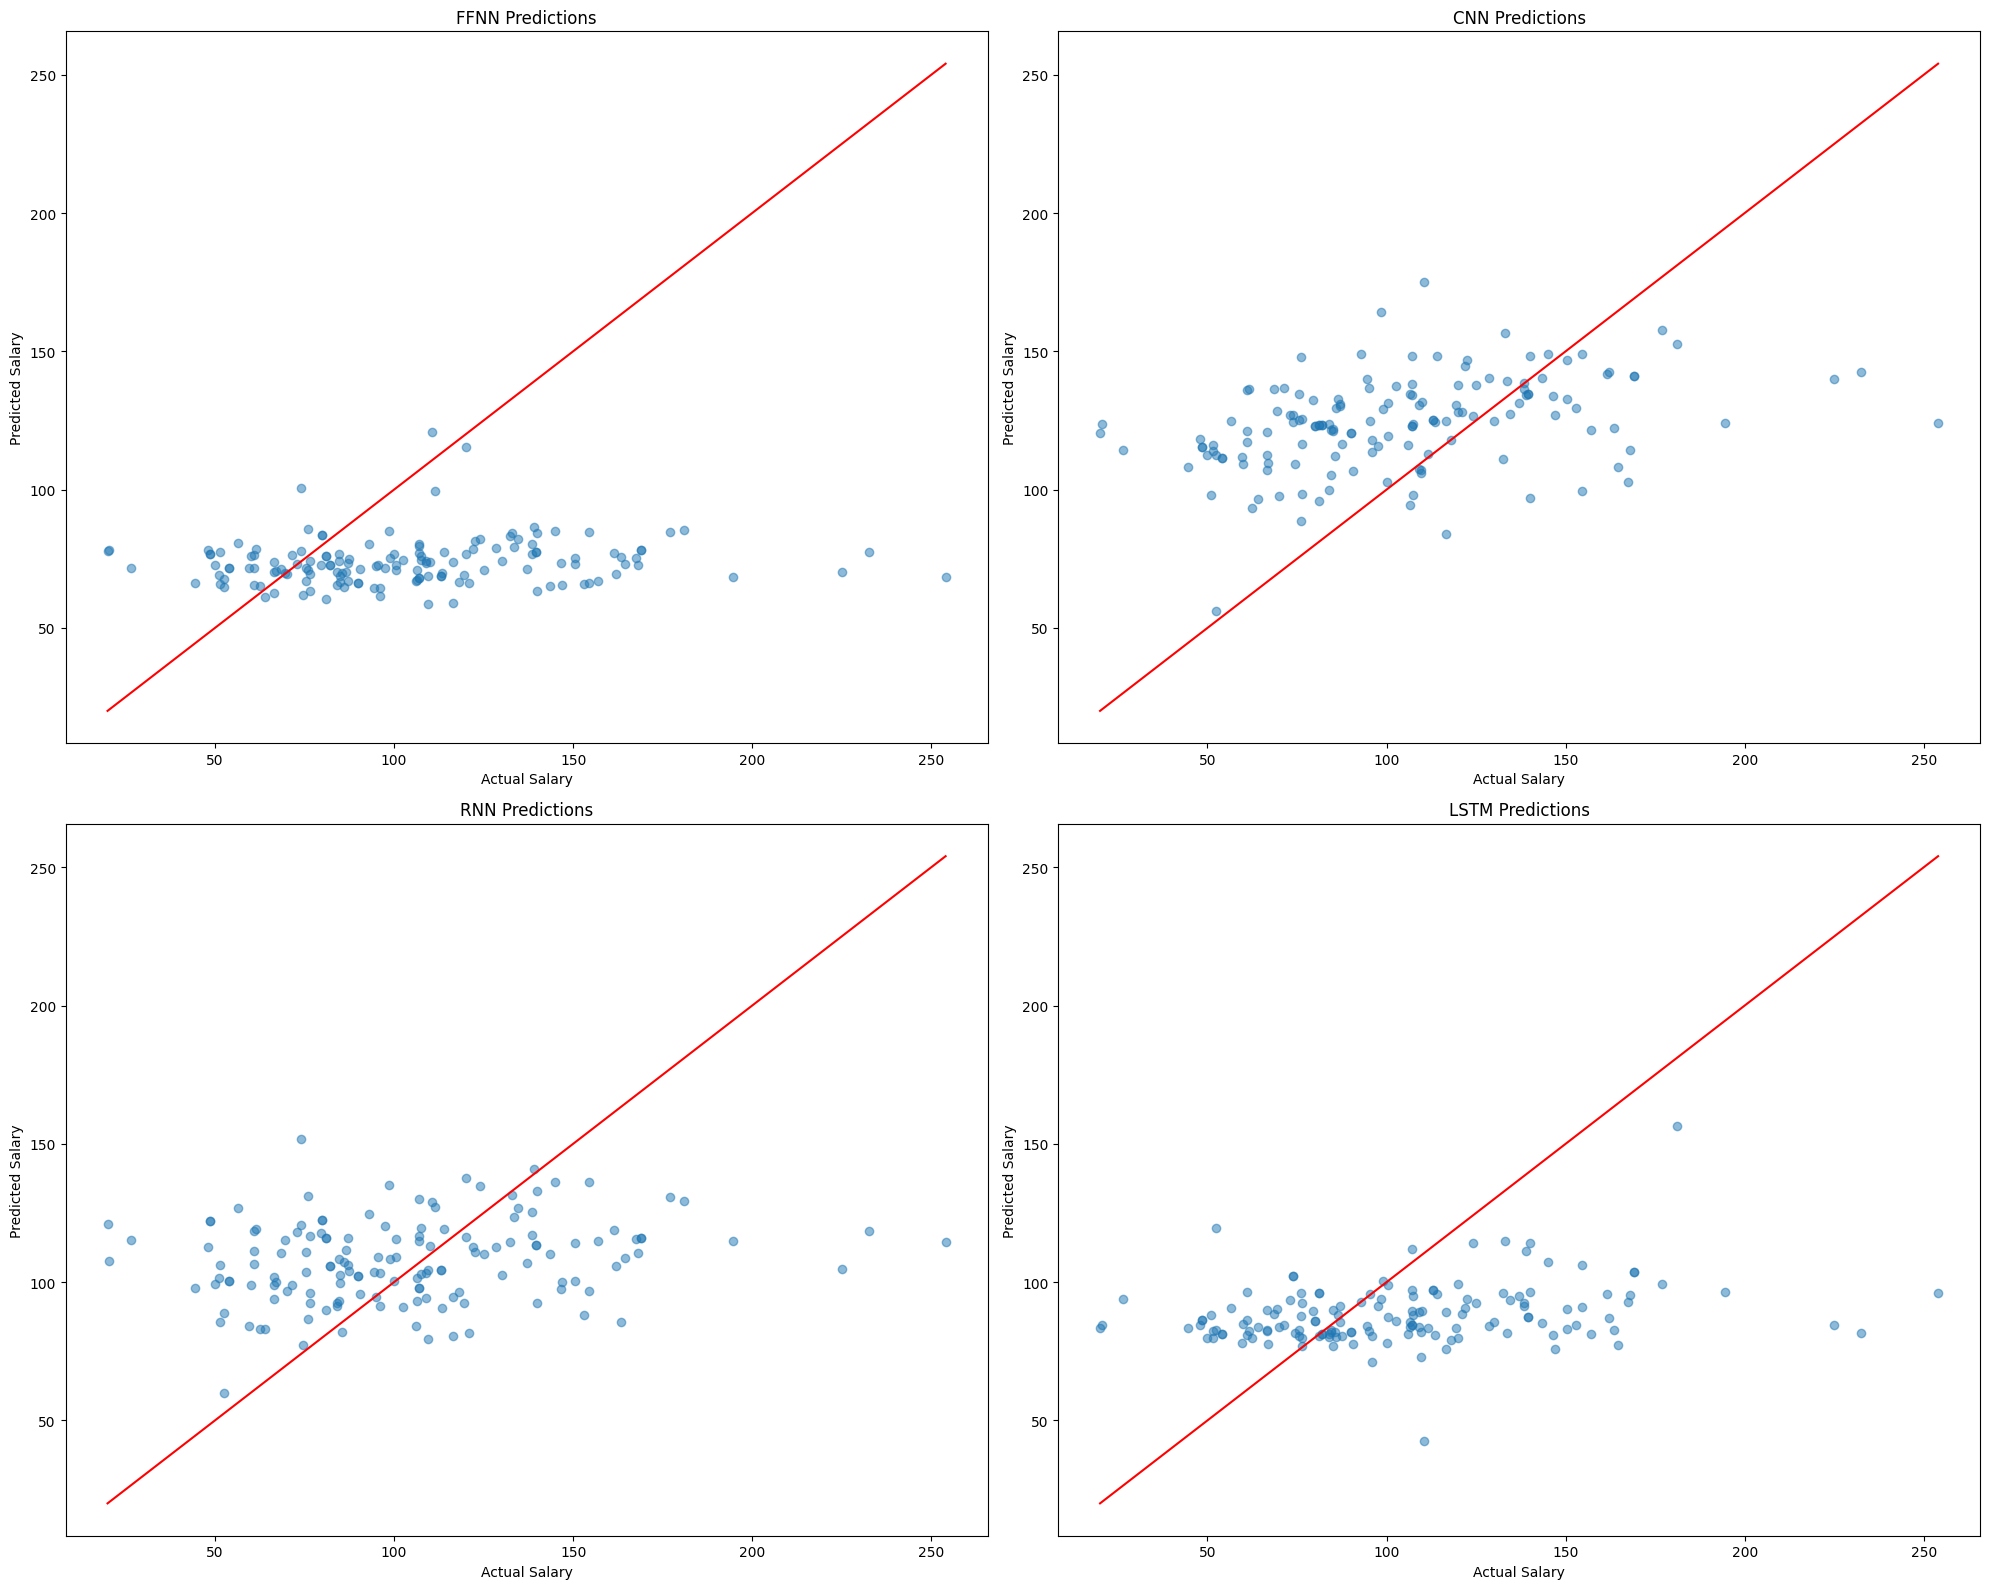

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot actual vs predicted salaries for each model
plt.figure(figsize=(20, 16))

# FFNN Predictions
plt.subplot(2, 2, 1)
plt.scatter(y_test, ffnn_pred, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r')
plt.xlabel('Actual Salary')
plt.ylabel('Predicted Salary')
plt.title('FFNN Predictions')

# CNN Predictions
plt.subplot(2, 2, 2)
plt.scatter(y_test, cnn_pred, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r')
plt.xlabel('Actual Salary')
plt.ylabel('Predicted Salary')
plt.title('CNN Predictions')

# RNN Predictions
plt.subplot(2, 2, 3)
plt.scatter(y_test, rnn_pred, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r')
plt.xlabel('Actual Salary')
plt.ylabel('Predicted Salary')
plt.title('RNN Predictions')

# LSTM Predictions
plt.subplot(2, 2, 4)
plt.scatter(y_test, lstm_pred, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r')
plt.xlabel('Actual Salary')
plt.ylabel('Predicted Salary')
plt.title('LSTM Predictions')

plt.tight_layout()
plt.show()
